import files


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ecommerce_sales_analysis.csv')
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [6]:
# check for null values
print(df.isnull().sum())

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64


In [15]:
# droping duplicates
df = df.drop_duplicates()


In [17]:
# adding total sales column
df['total_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)
df['total_sales']

0      6421
1      6027
2      5580
3      5022
4      6094
       ... 
995    5515
996    4511
997    5527
998    4546
999    7486
Name: total_sales, Length: 1000, dtype: int64

In [19]:
# category sales
category_sales = df.groupby('category')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
category_sales

,category,total_sales
0,Books,938229
6,Toys,917101
5,Sports,916371
2,Electronics,845120
3,Health,834414
1,Clothing,826536
4,Home & Kitchen,742141


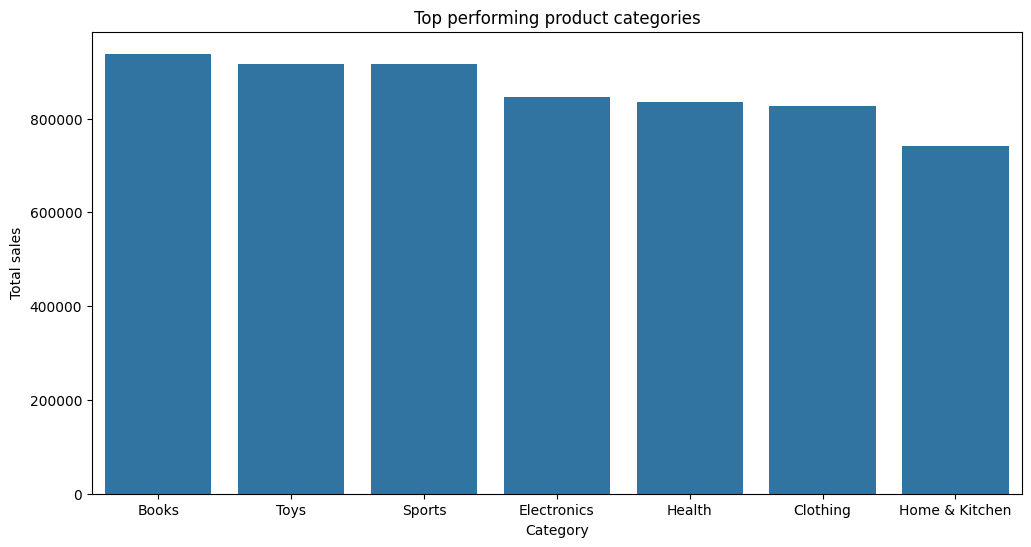

In [23]:
# ploting barchart of categorical total sales
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_sales', data=category_sales)
plt.title('Top performing product categories')
plt.xlabel('Category')
plt.ylabel('Total sales')
plt.show()

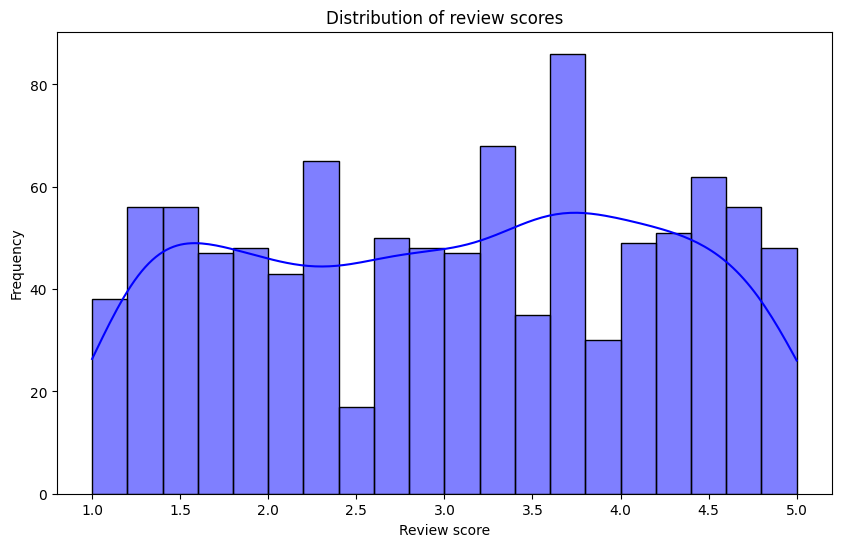

In [30]:
# review score histplot
plt.figure(figsize=(10, 6))
sns.histplot(df['review_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of review scores')
plt.xlabel('Review score')
plt.ylabel('Frequency')
plt.show()

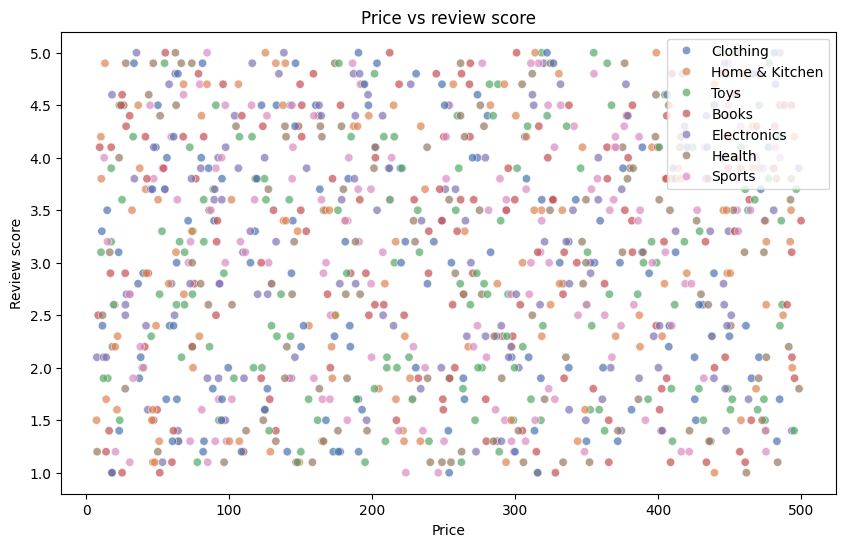

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_score', data=df, hue='category', palette='deep', alpha=0.7)
plt.title('Price vs review score')
plt.xlabel('Price')
plt.ylabel('Review score')
plt.legend(loc='upper right')
plt.show()

In [36]:
# top 10 sold products
# top10 = df['total_sales'].nlargest(10)
top10 = df.nlargest(10, 'total_sales')
top10

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
223,224,Product_224,Electronics,187.02,4.8,613,827,749,510,796,784,352,976,918,873,601,857,908,9151
285,286,Product_286,Clothing,22.79,3.1,728,951,933,701,786,600,572,825,834,596,573,710,840,8921
733,734,Product_734,Health,263.92,2.7,30,366,992,375,993,857,782,165,851,941,908,715,969,8914
904,905,Product_905,Sports,213.61,4.0,520,850,967,941,833,965,785,977,332,399,627,696,411,8783
179,180,Product_180,Sports,73.07,3.2,268,725,756,405,598,757,923,598,833,909,985,717,569,8775
852,853,Product_853,Books,108.90,4.4,305,80,1000,641,918,807,905,686,804,1000,732,318,874,8765
238,239,Product_239,Health,324.51,4.9,575,875,864,660,723,561,844,836,731,548,860,811,411,8724
923,924,Product_924,Electronics,400.93,2.4,758,992,746,783,995,651,821,800,656,726,495,67,793,8525
936,937,Product_937,Electronics,14.10,2.1,883,957,510,885,918,734,91,692,716,383,913,770,890,8459
196,197,Product_197,Toys,364.35,4.9,104,576,962,972,371,928,220,748,343,848,742,946,762,8418


C:\Users\bijit\AppData\Local\Temp\ipykernel_16032\2708846581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='total_sales', x='product_name', data=top10, palette='magma')


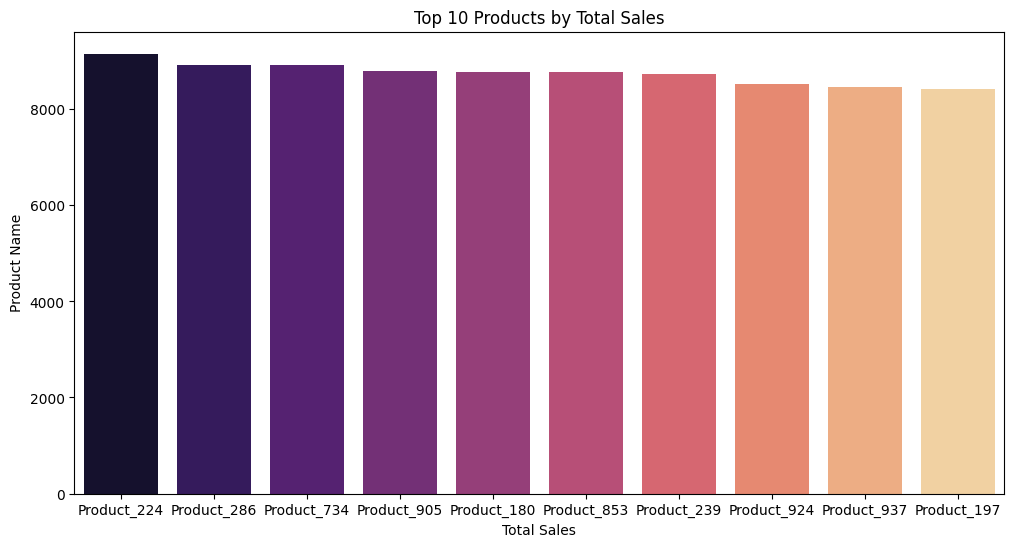

In [37]:
# top sold products in barchart
plt.figure(figsize=(12, 6))
sns.barplot(y='total_sales', x='product_name', data=top10, palette='magma')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()